In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv', index_col = 'Customer ID')
df.head()

,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
Customer ID,,,,,,,,,,,,,,,
1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [88]:
df.shape

(20000, 15)

In [89]:
df.apply(pd.isnull).sum()

Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [90]:
data = df.copy()

In [91]:
data.dropna(subset = ['Gender', 'Add-ons Purchased'], inplace = True)

In [92]:
data.isnull().sum()

Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Purchase Date        0
Shipping Type        0
Add-ons Purchased    0
Add-on Total         0
dtype: int64

In [93]:
data.shape

(15132, 15)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15132 entries, 1000 to 19997
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                15132 non-null  int64  
 1   Gender             15132 non-null  object 
 2   Loyalty Member     15132 non-null  object 
 3   Product Type       15132 non-null  object 
 4   SKU                15132 non-null  object 
 5   Rating             15132 non-null  int64  
 6   Order Status       15132 non-null  object 
 7   Payment Method     15132 non-null  object 
 8   Total Price        15132 non-null  float64
 9   Unit Price         15132 non-null  float64
 10  Quantity           15132 non-null  int64  
 11  Purchase Date      15132 non-null  object 
 12  Shipping Type      15132 non-null  object 
 13  Add-ons Purchased  15132 non-null  object 
 14  Add-on Total       15132 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.8+ MB


In [95]:
data.describe()

,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,15132.000000,15132.000000,15132.000000,15132.000000,15132.000000,15132.000000
mean,48.992400,3.088686,3184.261850,580.367742,5.473236,82.269162
std,18.020315,1.226645,2547.867058,311.934802,2.879513,52.988196
min,18.000000,1.000000,20.750000,20.750000,1.000000,5.010000
25%,34.000000,2.000000,1139.680000,361.180000,3.000000,42.360000
50%,49.000000,3.000000,2534.490000,674.320000,5.000000,71.990000
75%,65.000000,4.000000,4639.600000,791.190000,8.000000,108.965000
max,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [96]:
data.duplicated().sum()

0

In [97]:
x = data[['Age', 'Total Price']]
x.head()

,Age,Total Price
Customer ID,,
1000,53,5538.33
1000,53,741.09
1002,41,3164.76
1003,75,41.50
1004,41,83.00


In [98]:
scaler = MinMaxScaler(feature_range = (x['Total Price'].min(), x['Total Price'].max()))

In [99]:
x['Age'] = scaler.fit_transform(x[['Age']])

In [100]:
x.head()

,Age,Total Price
Customer ID,,
1000,6442.713710,5538.33
1000,6442.713710,741.09
1002,4240.897581,3164.76
1003,10479.376613,41.50
1004,4240.897581,83.00


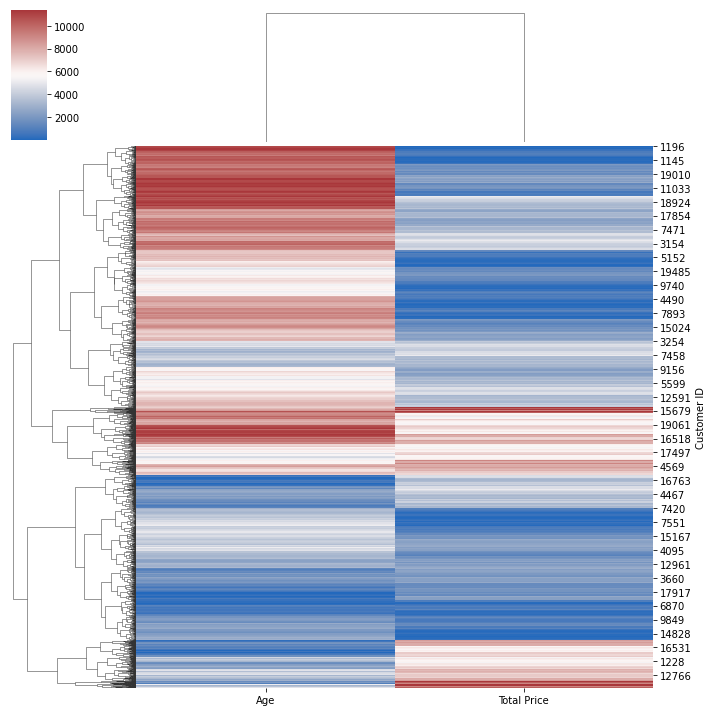

In [101]:
sns.clustermap(x, cmap = 'vlag')
plt.show()

In [106]:
x2 = data[['Age', 'Total Price']]

In [107]:
scaler2 = StandardScaler()

In [108]:
x2['Age'] = scaler2.fit_transform(x2[['Age']])
x2['Total Price'] = scaler2.fit_transform(x2[['Total Price']])

In [110]:
x2_scaled_df = pd.DataFrame(data = x2, columns = ['Age', 'Total Price'])
x2_scaled_df.head()

,Age,Total Price
Customer ID,,
1000,0.222401,0.923967
1000,0.222401,-0.958940
1002,-0.443536,-0.007654
1003,1.443285,-1.233528
1004,-0.443536,-1.217239


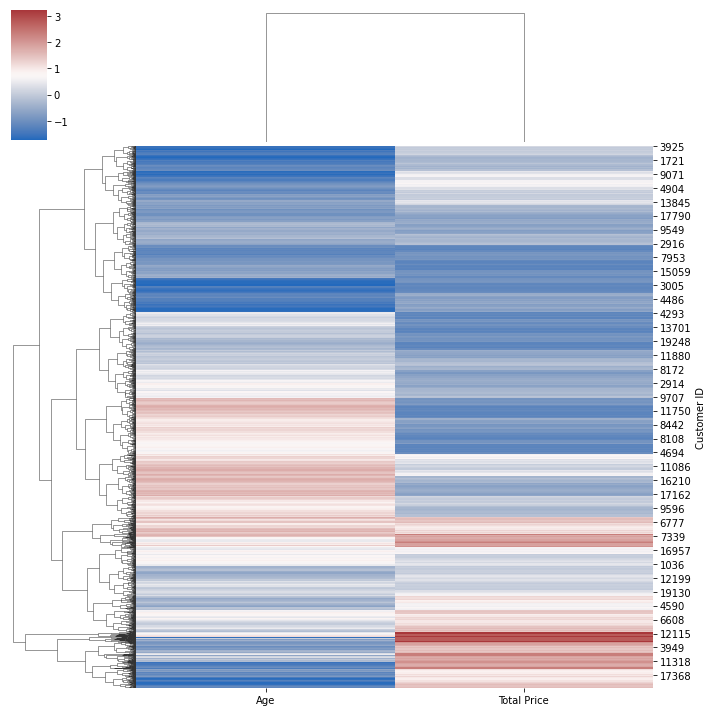

In [111]:
sns.clustermap(x2_scaled_df, cmap = 'vlag')
plt.show()

In [112]:
df2 = pd.read_csv('2- Countries-Clustering.csv', index_col = 'name')
df2.head()

,Longitude,Latitude,continent
name,,,
Aruba,-69.982677,12.520880,North America
Afghanistan,66.004734,33.835231,Asia
Angola,17.537368,-12.293361,Africa
Anguilla,-63.064989,18.223959,North America
Albania,20.049834,41.142450,Europe


In [113]:
df2.shape

(241, 3)

In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, Aruba to Zimbabwe
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  241 non-null    float64
 1   Latitude   241 non-null    float64
 2   continent  241 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.5+ KB


In [115]:
df2.apply(pd.isnull).sum()

Longitude    0
Latitude     0
continent    0
dtype: int64

In [116]:
df2.duplicated().sum()

0

In [117]:
df2.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


In [119]:
x3 = df2.drop(columns = ['continent'], axis = 1)
x3['Longitude'] = scaler2.fit_transform(x3[['Longitude']])
x3['Latitude'] = scaler2.fit_transform(x3[['Latitude']])
x3.head()

,Longitude,Latitude
name,,
Aruba,-1.171629,-0.175422
Afghanistan,0.720657,0.628927
Angola,0.046226,-1.111849
Anguilla,-1.075368,0.039797
Albania,0.081187,0.904683


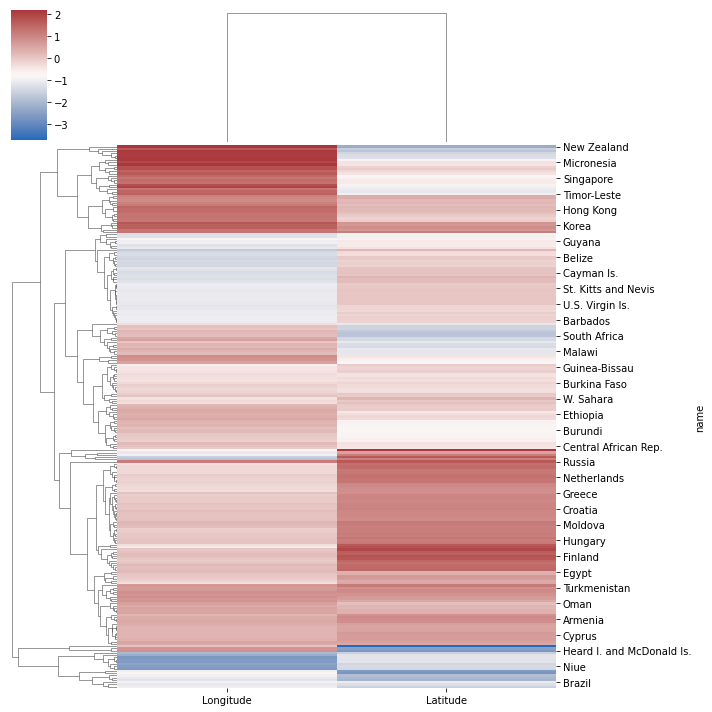

In [120]:
sns.clustermap(x3, cmap = 'vlag')
plt.show()